<a href="https://www.kaggle.com/code/prajita/san-francisco-air-cargo-traffic-analysis-notebook?scriptVersionId=98244412" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **San Francisco Air Traffic Cargo Statistics - Analysis using Python**

**This exercise has been done following the CRISP-DM Process, described as follows:**

**1. Business Understanding:** 

Over the last couple of decades, the air cargo industry has contributed significantly in transforming the supply chain networks across the world. It has played a pivotal role in facilitating access to new markets and the subsequent development of economies. Due to an increase in demand for faster delivery, technological advancements in cargo-tracking status, and hassle-free cross-border e-commerce processes, the air cargo industry is projected to grow at a CAGR of 4.0% during 2021–2027.
The objective of this article, therefore, is to analyze the air cargo operations data collected for San Francisco International Airport (SFO), California, USA, and answer some questions to better understand the trends of air cargo movement through this international airport. San Francisco International Airport is the largest airport in San Francisco Bay Area, the 7th busiest airport in the US (by passenger count), and features in the top 30 cargo airports in US.

**2. Data Understanding:** Discussed in [Section A](#section-a)

**3. Data Preparation :** Discussed in [Section B](#section-b)

**4. Analysing the Results**: Discussed in [Section C](#section-c)


### **Table of Contents**
* [Section A: Data Understanding](#section-a)
* [Section B: Data Preparation](#section-b)
* [Section C: Discussing Business Questions](#section-c)
    - [Q - C1: What percentages of  cargo (by weight) is exported and imported via SFO every year?](#section-c1)
    - [Q - C2: Discuss the import and export trends from every region over the years  via SFO](#section-c2)
    - [Q - C3: Which airlines plied the largest amount of cargo through the SFO in last five years?](#section-c3)

<a id="section-a"></a>
### **Section A: Data Understanding**
1. Importing the necessary files
2. Reading the file and storing it in a master dataframe
3. Creating a copy of master data file for further analysis.
3. Identifying any columns not necessary for analysis and renaming column names to identify them as original ones.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/san-francisco-air-traffic-cargo-statistics/Air_Traffic_Cargo_Statistics.csv


In [2]:
'''
Step A1: Declaring main_dataset_cargo variable to read and store the dataset of AirCargoTrafficData as Master dataset and Print
'''
main_dataset_cargo=pd.read_csv("../input/san-francisco-air-traffic-cargo-statistics/Air_Traffic_Cargo_Statistics.csv")
main_dataset_cargo.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.604
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.476
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,55427,25.142
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,50278,22.806
4,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649


In [3]:
'''
Step A2: Creating a copy of the master dataset to make any changes for analysis.
'''
cargo=main_dataset_cargo
cargo.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.604
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.476
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,55427,25.142
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,50278,22.806
4,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649


In [4]:
'''
Step A3:Getting the total no. of rows and columns in the main data set
'''
print("The data set has ",cargo.shape[0],'rows and ',cargo.shape[1],'columns.')

The data set has  35599 rows and  12 columns.


In [5]:
'''Step A4: Counting the no. of null values in each column.'''
cargo.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Cargo Type Code                 0
Cargo Aircraft Type             0
Cargo Weight LBS                0
Cargo Metric TONS               0
dtype: int64

In [6]:
'''Step A5: Dropping the columns that carry the codes, since they do not provide any additional info for analysis'''

print("Dropping the columns that carry the codes, since they do not provide any additional info for analysis")
cargo.drop(['Operating Airline IATA Code','Published Airline IATA Code'],axis=1,inplace=True)


Dropping the columns that carry the codes, since they do not provide any additional info for analysis


In [7]:
'''Step A6: Print the list of columns which are to be used finally'''
print("\nThe remaining columns are as follows: ")
for col in cargo.columns: 
    print(cargo.columns.get_loc(col)+1,': ',col)


The remaining columns are as follows: 
1 :  Activity Period
2 :  Operating Airline
3 :  Published Airline
4 :  GEO Summary
5 :  GEO Region
6 :  Activity Type Code
7 :  Cargo Type Code
8 :  Cargo Aircraft Type
9 :  Cargo Weight LBS
10 :  Cargo Metric TONS


In [8]:
'''Step A7: Renaming column number to identify them as the original columns (and differentiate from newly created ones(if required))'''

for col in cargo.columns:
    newname=str(cargo.columns.get_loc(col)+1)+'_'+col
    cargo.rename(columns={col:newname},inplace=True)

In [9]:
#Print the table for analysis
cargo.head()

,1_Activity Period,2_Operating Airline,3_Published Airline,4_GEO Summary,5_GEO Region,6_Activity Type Code,7_Cargo Type Code,8_Cargo Aircraft Type,9_Cargo Weight LBS,10_Cargo Metric TONS
0,200507,ABX Air,ABX Air,Domestic,US,Deplaned,Cargo,Freighter,45423,20.604
1,200507,ABX Air,ABX Air,Domestic,US,Enplaned,Cargo,Freighter,106869,48.476
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,55427,25.142
3,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,50278,22.806
4,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649


<a id="section-b"></a>
### **Section B: Data Preparation** 
Examining the variables, creating new columns for better analysis, and checking for bad data (like spelling mistakes, duplicates, etc.) by plotting visualizations.**

#### Variables and their types:
1. Activity Period - Categorical
2. Operating Airline - Categorical
3. Published Airline - Categorical
4. GEO Summary - Categorical
5. GEO Region - Categorical
6. Activity Type Code - Categorical
7. Cargo Type Code - Categorical
8. Cargo Aircraft Type - Categorical
9. Cargo Weight LBS - Continuous
10. Cargo Metric TONS - Continuous


**Column name: 1_Activity Period**: The format of this variable is in xxxxyy, where xxxx is the year and yy is the month in numbers. Our objective is to split this variable into two parts: Year and Month.

In [10]:
#Step B1.1: Converting the Activity Period column values to datetime format, to get the month and year values in accessible way.
cargo['1_Activity Period']=pd.to_datetime(cargo['1_Activity Period'],format='%Y%m').dt.to_period('M')
cargo.tail()

,1_Activity Period,2_Operating Airline,3_Published Airline,4_GEO Summary,5_GEO Region,6_Activity Type Code,7_Cargo Type Code,8_Cargo Aircraft Type,9_Cargo Weight LBS,10_Cargo Metric TONS
35594,2021-09,United Airlines,United Airlines,International,Middle East,Deplaned,Express,Passenger,9739,4.418
35595,2021-09,United Airlines,United Airlines,International,Middle East,Deplaned,Mail,Passenger,13543,6.143
35596,2021-09,United Airlines,United Airlines,International,Middle East,Enplaned,Cargo,Passenger,395220,179.272
35597,2021-09,United Airlines,United Airlines,International,Middle East,Enplaned,Express,Passenger,14432,6.546
35598,2021-09,United Airlines,United Airlines,International,Middle East,Enplaned,Mail,Passenger,40440,18.344


In [11]:
#Step B1.2: Adding a separate new column to store the year, column name: 'Activity Year' 
cargo.insert(0,"c_Activity Year",cargo['1_Activity Period'].dt.year)
cargo.head()


,c_Activity Year,1_Activity Period,2_Operating Airline,3_Published Airline,4_GEO Summary,5_GEO Region,6_Activity Type Code,7_Cargo Type Code,8_Cargo Aircraft Type,9_Cargo Weight LBS,10_Cargo Metric TONS
0,2005,2005-07,ABX Air,ABX Air,Domestic,US,Deplaned,Cargo,Freighter,45423,20.604
1,2005,2005-07,ABX Air,ABX Air,Domestic,US,Enplaned,Cargo,Freighter,106869,48.476
2,2005,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,55427,25.142
3,2005,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,50278,22.806
4,2005,2005-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649


1. Oldest record belong to  2005-07  and the latest record is for the month of  2021-09

2. Distribution Table of no. of cargos shipped based on year:


<AxesSubplot:>

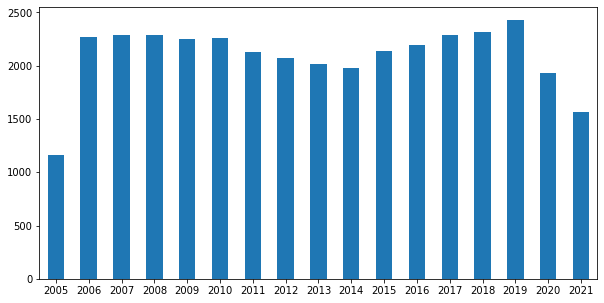

In [12]:
# B.1.3: Analyzing Activity Period
print("1. Oldest record belong to ",min(cargo['1_Activity Period']),' and the latest record is for the month of ',max(cargo['1_Activity Period']))
print("")
print("2. Distribution Table of no. of cargos shipped based on year:")
period_dist=cargo['c_Activity Year'].value_counts().sort_index(axis=0)
period_dist.plot(kind='bar',rot=0,figsize=(10,5))


*Column **1_Activity Period** Review Completed.*

**Column name: 2_Operating Airline** Inspecting the distribution of values, to identify if there is any anomalous data entry.

In [13]:
#Step B2.1: Checking data quality of Operating Airline column by identifying occurence of duplicate values, spelling mistakes with/without similar names,etc.
op_air=pd.DataFrame(cargo['2_Operating Airline'].value_counts()).sort_index(axis=0)
pd.set_option('display.max_rows', None)#Removing the limit for displaying no. of rows to get a clear picture
#op_air.plot(kind='barh',figsize=(20,20))
op_air

,2_Operating Airline
ABX Air,262
"ASTAR USA, LLC",16
ATA Airlines,40
"Aer Lingus, Ltd.",209
Aeromexico,9
Air Berlin,60
Air Canada,1061
Air Canada Jazz,2
Air Cargo Carriers,140
Air China,759


**Observations:**
1. **Air Transport International, Inc.and Air Transport International, LLC** : are the same airlines, so rows carrying these values can be replaced with one single value, i.e., Air Transport International.
2. **United Airlines - Pre 07/01/2013 & United Airlines**: On March 31, 2013, United merged with and into Continental, with Continental continuing as the surviving corporation of the Merger and as a wholly-owned subsidiary of UAL. So we should verify that there is no occurence of United Airlines - Pre 07/01/2013.

In [14]:
#Step B2.2: Replacing the differing values of Air Transport International, Inc.and Air Transport International, LLC with 'Air Transport International'
cargo['2_Operating Airline'].replace('Air Transport International, Inc.','Air Transport International',inplace=True)
cargo['2_Operating Airline'].replace('Air Transport International, LLC.','Air Transport International',inplace=True)

In [15]:
#Step B2.3: Verifing the replacement operation by identifying the no. of rows for 'Air Transport International'
cargo['2_Operating Airline'].value_counts().sort_index(axis=0)

ABX Air                                              262
ASTAR USA, LLC                                        16
ATA Airlines                                          40
Aer Lingus, Ltd.                                     209
Aeromexico                                             9
Air Berlin                                            60
Air Canada                                          1061
Air Canada Jazz                                        2
Air Cargo Carriers                                   140
Air China                                            759
Air France                                           720
Air India Limited                                    134
Air Italy S.P.A                                       14
Air New Zealand                                      762
Air Pacific Limited dba Fiji Airways                  76
Air Transport International                           44
Alaska Airlines                                     1402
All Nippon Airways             

In [16]:
#cargo['2_Operating Airline'].value_counts().sort_index(axis=0)

In [17]:
#Step B2.4: Verifying that 'United Airlines - Pre 07/01/2013' doesn't exist in any records post 2013. No it doesn't occur, which varifies the integrity of the columns' data.
cargo[['c_Activity Year','2_Operating Airline']][(cargo['2_Operating Airline']=='United Airlines - Pre 07/01/2013') & (cargo['c_Activity Year']>2013)]

,c_Activity Year,2_Operating Airline


*Column **'2_Operating Airline'** Review Completed.*

**Column: 3_Published Airline**

In [18]:
#Step B3.1: Repeating steps B2.1 and B2.2 for column 3_Published Airline
pub_air=pd.DataFrame(cargo['3_Published Airline'].value_counts()).sort_index(axis=0)
pd.set_option('display.max_rows', None)#Removing the limit for displaying no. of rows to get a clear picture
#op_air.plot(kind='bar',figsize=(20,10))
pub_air

,3_Published Airline
ABX Air,262
ATA Airlines,40
"Aer Lingus, Ltd.",209
Aeromexico,9
Air Berlin,60
Air Canada,1063
Air Cargo Carriers,140
Air China,759
Air France,720
Air India Limited,134


In [19]:
#Step B4.2: Replacing the differing values of Air Transport International, Inc.and Air Transport International, LLC with 'Air Transport International'
cargo['3_Published Airline'].replace('Air Transport International, Inc.','Air Transport International',inplace=True)
cargo['3_Published Airline'].replace('Air Transport International, LLC.','Air Transport International',inplace=True)

In [20]:
#Step B4.3: Verifing the replacement operation by identifying the no. of rows for 'Air Transport International'
cargo['3_Published Airline'].value_counts().sort_index(axis=0)

ABX Air                                              262
ATA Airlines                                          40
Aer Lingus, Ltd.                                     209
Aeromexico                                             9
Air Berlin                                            60
Air Canada                                          1063
Air Cargo Carriers                                   140
Air China                                            759
Air France                                           720
Air India Limited                                    134
Air Italy S.P.A                                       14
Air New Zealand                                      762
Air Pacific Limited dba Fiji Airways                  76
Air Transport International                           44
Alaska Airlines                                     2064
All Nippon Airways                                   697
American Airlines                                    936
Ameriflight                    

In [21]:
#Step B4.4: Verifying that 'United Airlines - Pre 07/01/2013' doesn't exist in any records post 2013. No it doesn't occur, which varifies the integrity of the columns' data.
cargo[['c_Activity Year','3_Published Airline']][(cargo['2_Operating Airline']=='United Airlines - Pre 07/01/2013') & (cargo['c_Activity Year']>2013)]

,c_Activity Year,3_Published Airline


*Column **'3_Published Airline'** Review Completed.*

In [22]:
#Optional Step: To view the list of column names 
#cargo.columns

**Column :'4_GEO Summary', '5_GEO Region'**

<AxesSubplot:title={'center':'5_GEO Region'}>

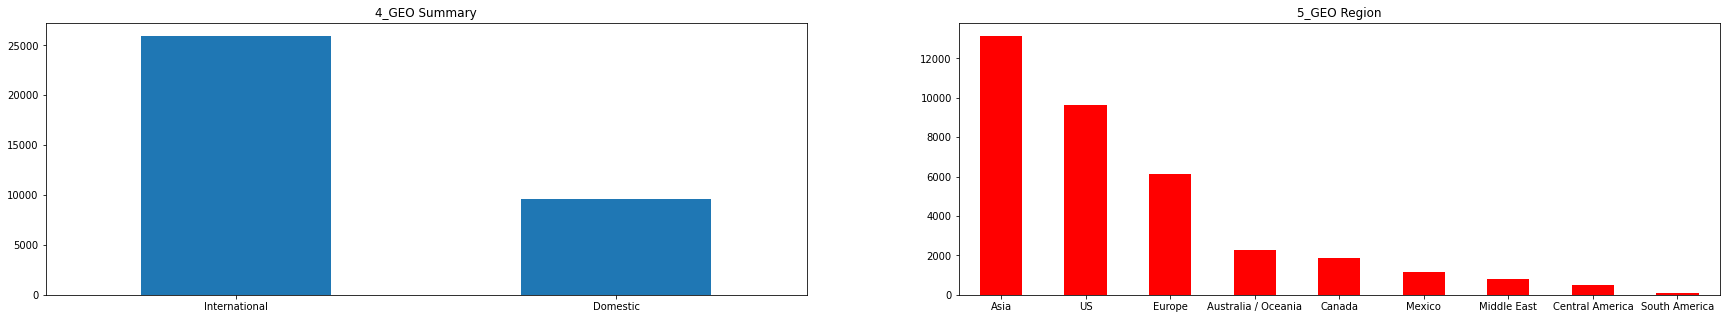

In [23]:
#Step B5: Plotting the distribution of values from the columns '4_GEO Summary', '5_GEO Region' to identify any outlier value. No such values found for these columns.
figure, axes = plt.subplots(1, 2,figsize=(30,5))
cargo['4_GEO Summary'].value_counts().plot(ax=axes[0],kind='bar',rot=0,title='4_GEO Summary')
cargo['5_GEO Region'].value_counts().plot(ax=axes[1],kind='bar',rot=0,title='5_GEO Region',color='red')

*Column **'4_GEO Summary' & '5_GEO Region'** Review Completed.*

<AxesSubplot:title={'center':'8_Cargo Aircraft Type'}>

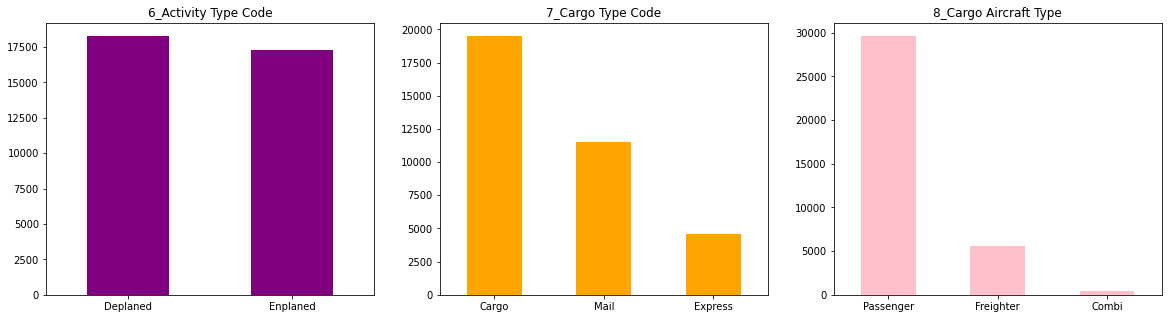

In [24]:
#Step B6: Plotting the distribution of values from the columns '6_Activity Type Code', '7_Cargo Type Code','8_Cargo Aircraft Type' to identify any outlier value. No such values found for these columns.
figure, axes = plt.subplots(1, 3,figsize=(20,5))
cargo['6_Activity Type Code'].value_counts().plot(ax=axes[0],kind='bar',rot=0,title='6_Activity Type Code',color='purple')
cargo['7_Cargo Type Code'].value_counts().plot(ax=axes[1],kind='bar',rot=0,title='7_Cargo Type Code',color='orange')
cargo['8_Cargo Aircraft Type'].value_counts().plot(ax=axes[2],kind='bar',rot=0,title='8_Cargo Aircraft Type',color='pink')

*Columns **'6_Activity Type Code', '7_Cargo Type Code','8_Cargo Aircraft Type'** Review Completed.*

**Columns: '9_Cargo Weight LBS', '10_Cargo Metric TONS'**

In [25]:
#Step B7: Verifying the datatypes of the columns '9_Cargo Weight LBS', '10_Cargo Metric TONS' to idenitify any value of different type. No such outlier present in both the columns
#Also checking if there are any null values in these columns. No such occurrence in either of the columns.
print(cargo[['9_Cargo Weight LBS', '10_Cargo Metric TONS']].dtypes)
print("No. of null values occurring in column :9_Cargo Weight LBS =  ",cargo['9_Cargo Weight LBS'].isnull().sum())
print("No. of null values occurring in column :10_Cargo Metric TONS =  ",cargo['10_Cargo Metric TONS'].isnull().sum())

9_Cargo Weight LBS        int64
10_Cargo Metric TONS    float64
dtype: object
No. of null values occurring in column :9_Cargo Weight LBS =   0
No. of null values occurring in column :10_Cargo Metric TONS =   0


*Columns **'9_Cargo Weight LBS', '10_Cargo Metric TONS'** Review Completed.*

<a id="section-c"></a>
### **Section C: Identifying Questions and answering them through data analysis**

The dataset provides information only about the traffic. Since there is no mention of cost, revenue or monetary data, hence, the study would also remain limited to traffic anaysis without taking in consideration the impact of fuel charges, discounts, pricing of freight carriers, taxes, etc. 

### **Task 1: Identify 3 business questions**

[**Question 1:** What percentages of  cargo (by weight) is exported and imported via SFO every year?](#section-c1)


[**Question 2:** Discuss the import and export trends w.r.t every region over the years  via SFO.](#section-c2)


[**Question 3:** Which airlines plied the largest amount of cargo through the SFO in last five years?](#section-c3)


<a id="section-c1"></a>
#### **Question1:**

**What percentage of cargo coming to San Francisco is operating for International shipments?**

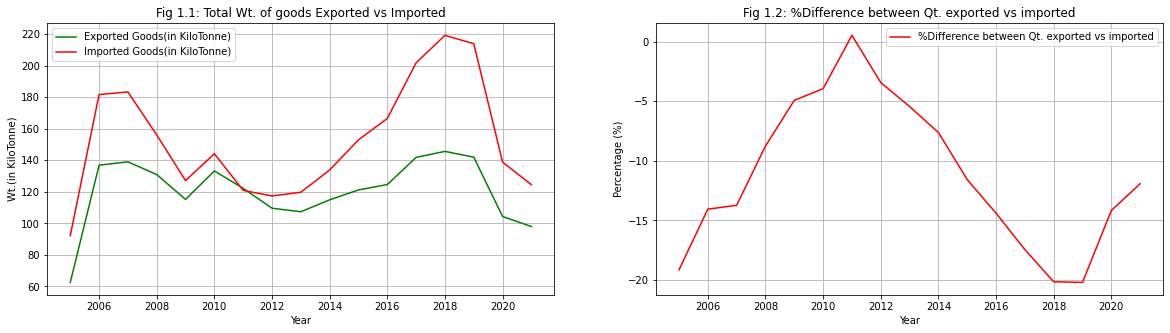

In [26]:
#Step C-1.1: Extracting 'c_Activity Year' and '10_Cargo Metric TONS' columns and storing in a new Dataframe called 'ques3'
ques_1=cargo[['c_Activity Year','10_Cargo Metric TONS']]

#Step C-1.2: Creating two separate dataframes to store international and domestic shipments for every year. Each will be a subset of 'act' dataframe
exports_wt=(ques_1[(cargo['6_Activity Type Code']=='Enplaned') & (cargo['4_GEO Summary']=='International')].groupby(['c_Activity Year']).sum()/1000).round(2).rename(columns={"10_Cargo Metric TONS":"Exported Goods(in KiloTonne)"})

imports_wt=(ques_1[(cargo['6_Activity Type Code']=='Deplaned') & (cargo['4_GEO Summary']=='International')].groupby(['c_Activity Year']).sum()/1000).round(2).rename(columns={"10_Cargo Metric TONS":"Imported Goods(in KiloTonne)"})

#Step C-1.3: Creating a variable total_ship to store total no. of shipments for every year
total_ship=exports_wt['Exported Goods(in KiloTonne)']+ imports_wt['Imported Goods(in KiloTonne)']


#Step C-1.4: Creating a variable int_ship_percent for calculating and storing the % of international shipments for every year
export_percent=pd.DataFrame()
export_percent['Export %']=(((exports_wt['Exported Goods(in KiloTonne)']/total_ship)*100).round(2))#.rename(columns={"#International Shipments" :"% International Shipments"})
import_percent=pd.DataFrame()
import_percent['Import %']=100-export_percent
int_ship_avg=export_percent.mean()
diff_percentage=pd.DataFrame(data=export_percent['Export %']-import_percent['Import %'], columns=['%Difference between Qt. exported vs imported'])

#Step C-1.5: Plotting int_ship variable and the int_ship_percent variable together

figure,axes=plt.subplots(1,2,figsize=(20,5))
exports_wt.plot(ax=axes[0],kind='line',rot=0,color='green',title='Fig 1.1: Total Wt. of goods Exported vs Imported',grid=True,xlabel='Year',ylabel='Wt.(in KiloTonne)')
imports_wt.plot(ax=axes[0],kind='line',rot=0,color='red',xlabel='Year',grid=True)

diff_percentage.plot(ax=axes[1],kind='line',rot=0,color='red',grid=True,title='Fig 1.2: %Difference between Qt. exported vs imported',xlabel='Year',ylabel='Percentage (%)',legend=True)
plt.show()

**Description of charts**
1. Fig1- Total Wt. of Goods Exported Vs Imported 
 - The line chart shows total weight of shipments (in KiloTonnes) exported(in green) and imported(in red) over the period of 2005 to 2021.
2. Fig2- % (of total trade)Difference between Imports and Exports from SFO
 - This line charts shows the difference in % contribution(in total trade) of imports vs exports over the period of 2005 to 2021

**Analysis:**

The total imported goods have always been higher than total exports and the difference have been steadily falling from 2005 to 2010.But from 2011, we can see in Fig:2, that overall negative deficit (imports-exports) in terms of quantity is also growing at a steady rate. From Fig:1, we can also conclude that the rate at which quantity of imported goods increased is far higher than that of exported goods. 

A dip in imports and exports occurred in 2020 and can be attributed to the impact of the global pandemic of novel Coronavirus (Covid-19).
 

------

<a id="section-c2"></a>
#### **Question 2**:

**Discuss the import and export trends with respect to every region over the years in via San Francisco.**

In [27]:
#Step C-2.1: Creating filters to select only the export and imports shipment records separately
export_filter=(cargo['4_GEO Summary']=='International') & (cargo['6_Activity Type Code']=='Enplaned')
import_filter=(cargo['4_GEO Summary']=='International') & (cargo['6_Activity Type Code']=='Deplaned')

#Step C-2.2: Applying the above filters to create a subset of data containing select details of export and imports shipment records
q2_exp=cargo[export_filter][['c_Activity Year','5_GEO Region','10_Cargo Metric TONS']]
q2_imp=cargo[import_filter][['c_Activity Year','5_GEO Region','10_Cargo Metric TONS']]

'''Optional Step: Verifying whether list of countries for import and export have same values 
if set(q2_exp['5_GEO Region'].unique())==set(q2_imp['5_GEO Region'].unique()):
    print(True)'''

#Step C-2.3: Creating a separate the list of regions 
regions=q2_exp['5_GEO Region'].unique()
    #print(regions)
    
#Step C-2.4: Creating two separate empty dataframes for storing the value of weights of exports and imports separately for every region
export_summary=pd.DataFrame()
import_summary=pd.DataFrame()

#Step C-2.5: Evaluating the export and import % for every region and updating respective values in export_summary and import_summary
for val in regions:
    export_summary[val]=(q2_exp[q2_exp['5_GEO Region']==val][['c_Activity Year','10_Cargo Metric TONS']].groupby('c_Activity Year').sum()).round(2)
    import_summary[val]=(q2_imp[q2_imp['5_GEO Region']==val][['c_Activity Year','10_Cargo Metric TONS']].groupby('c_Activity Year').sum()).round(2)  

#Step C-2.6: Checking if there are any NaNValues in the summary tables
print('============')
print("Export Table : ")
print(export_summary)
print('============')
print("Import Table : ")
print(import_summary)
print('============')


Export Table : 
                  Canada      Asia    Europe  Australia / Oceania  Mexico  \
c_Activity Year                                                             
2005              815.85  43066.16  17138.17              1341.93  137.44   
2006             2082.94  95518.47  34574.18              4380.55  287.49   
2007             1975.92  94187.83  36562.04              6045.98  180.74   
2008             1420.14  88268.57  34830.70              6157.54  151.94   
2009              721.64  81662.67  26089.56              4324.61  143.30   
2010              774.46  94450.03  29784.07              4863.41  151.28   
2011              636.86  85172.98  29195.72              3674.92  324.19   
2012              556.03  75406.20  27098.02              3369.80  247.84   
2013              453.68  74331.49  26334.86              3396.25  133.45   
2014              508.58  80542.64  27800.28              4712.57  184.24   
2015              847.48  85781.91  27068.63              43

In [28]:

#Step C-2.7: Replacing the NaN values with 0
# The NaN Values in export and import summary table indicate that some countries did not have any import or export flight operations from San Francisco for those years. Therefore, these values can be replaced with 0.
export_summary.fillna(0,inplace=True)
import_summary.fillna(0,inplace=True)

#Step C-2.8: Adding a new column in each of the summary table named 'Total Exports' and 'Total Imports',respectively. Each row stores the sum total of the weights exported/imported for a particular year
export_summary['Total Exports']=export_summary.agg("sum", axis="columns")
import_summary['Total Imports']=import_summary.agg("sum", axis="columns")


In [29]:
#Step C-2.9: Creating separate dataframes for storing the % values of yearly export and imports for every country
import_percent_reg=pd.DataFrame()
export_percent_reg=pd.DataFrame()
for val in regions:
    import_percent_reg[val]=((import_summary[val]/import_summary['Total Imports'])*100).round(2)
    export_percent_reg[val]=((export_summary[val]/export_summary['Total Exports'])*100).round(2)

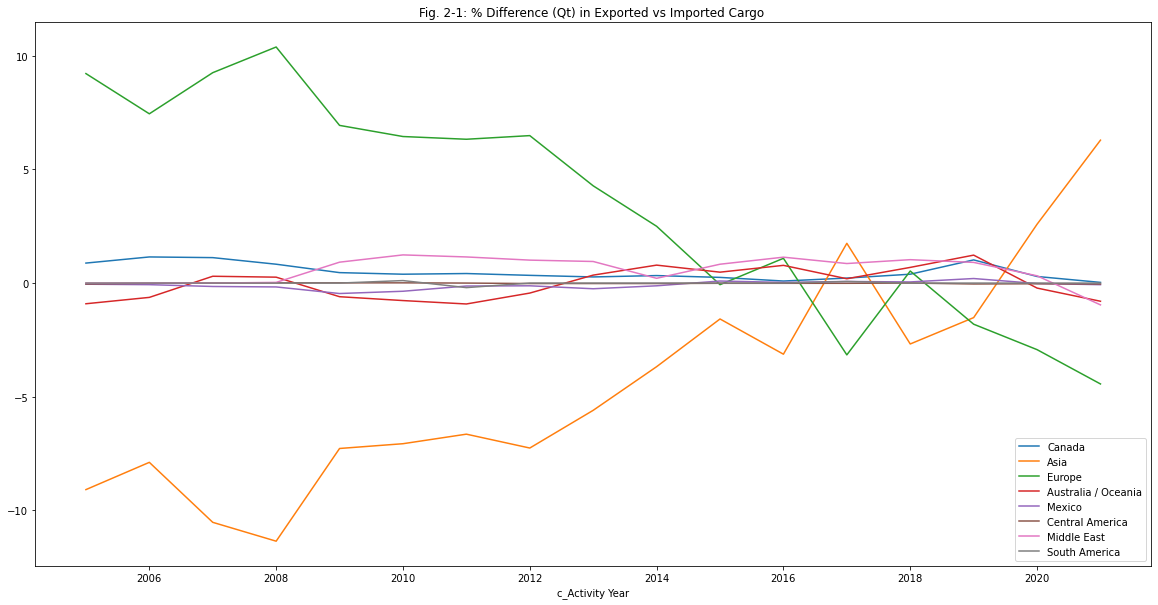

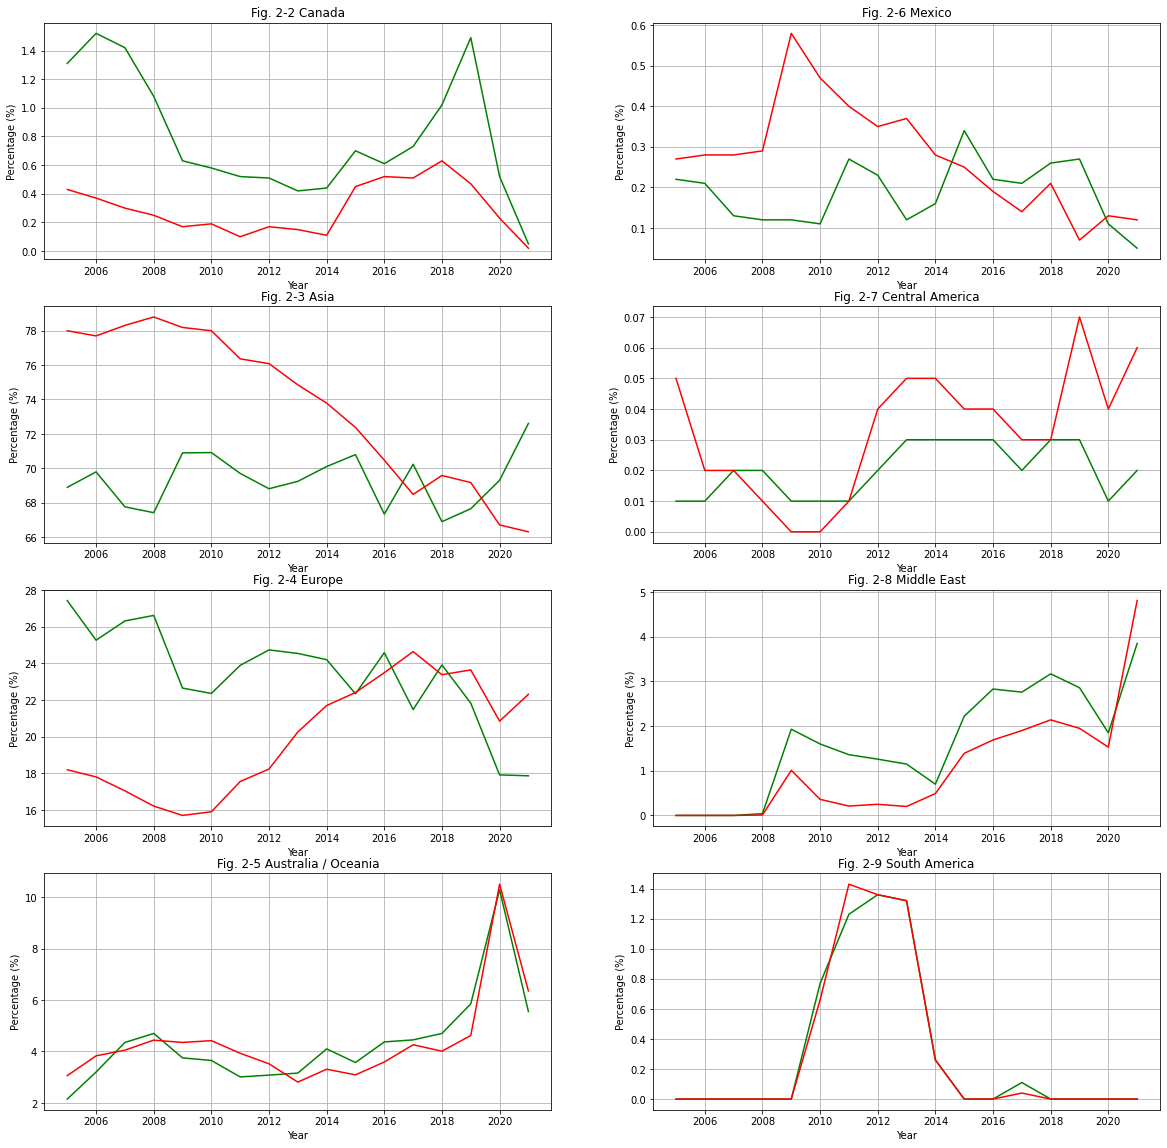

In [30]:
#Step C-2.10: 
diff_perc_reg=export_percent_reg-import_percent_reg
diff_perc_reg.plot(title='Fig. 2-1: % Difference (Qt) in Exported vs Imported Cargo ',figsize=(20,10))

#Step C-2.11: Plotting the yearly export vs import % separately for every country
figure,axes=plt.subplots(4,2,figsize=(20,20))
i=0
j=0
count=2
for val in regions:
    
    export_percent_reg[val].plot(ax=axes[i][j],kind='line',rot=0,color='green',xlabel='Year',grid=True,title='Fig. 2-'+str(count)+' '+val, ylabel='Percentage (%)')
    import_percent_reg[val].plot(ax=axes[i][j],kind='line',rot=0,color='red',xlabel='Year',grid=True)
    if i<3:
        i=i+1
        
    else:
        j=1
        i=0
    count+=1

<u>**Description of graphs**</u>

**1. Fig 2-1:** Difference (Qt) in Exported vs Imported Cargo
 - This graph shows the % difference in exported and imported cargo (in terms of quantity) for every region over the period of 2005 to 2021:
 
**2. Fig 2-2 to Fig 2-9**: Exports% (green line) vs Imports%(red line) of the regions shown separately for every country.

<u> **Analysis of top 3 regions** </u>

**1. Asia:**

- Fig.2-1: From -10% in 2005, the deficit between imports and exports have been steadily declining and post 2019 it has turned positive. But it is important to note that this trend is for SFO and does not reflect the trade activities of entire USA.
- Fig.2-3: Overall imports from Asia has declined linearly from 78% to 66%, exports also fluctuate between 70% and 72%. This tells us that Asia remains a major trade destination and a <u>big chunk of exports and imports taking place from SFO is for Asia region.</u>

**2. Europe:**

- Fig.C2-1: SFO has been a net exporter to Europe since 2005,but the trade deficit (in terms of qt.) have been steadily falling. By 2016,qt. of imports started exceeding exports and by 2021, the difference is that 0f almost -5%.
- Fig. 2-4: Europe has been the second biggest destination for exports and imports from SFO.Though a sharp decline in exports in 2020 (18%) from 22% in 2019, a steep increase in imports are recieved at SFO from European region since 2010. Within the period of 2010-2016, the imports have increased by 10%.

**3. Australia /Oceania:**
- Fig. C2-5:Australia has been the third largest destination for exports and imports from SFO.Both imports and exports showed a spike of 10% in 2020 and the trade deficit (Fig 2-1) has been steady between -1% to 0.5%. 
   

<a id="section-c3"></a>
#### **Question 3**:

**Which airlines plied the largest amount of cargo through the SFO in last five years?**

In [31]:
#Step C-3.1: Define the condition to extract the necessary data: All international cargo shipments from 2016 to 2021
condition=(cargo['4_GEO Summary']=='International') & (cargo['7_Cargo Type Code']=='Cargo') & (cargo['c_Activity Year']>2016)
#Step C-3.2: Define all_ship to store year of shipments, airlines and the weight transported on the records that fulfill the above condition
all_ship=cargo[condition][['c_Activity Year','3_Published Airline','10_Cargo Metric TONS']]
all_ship.head()

,c_Activity Year,3_Published Airline,10_Cargo Metric TONS
25067,2017,"Aer Lingus, Ltd.",51.830
25068,2017,"Aer Lingus, Ltd.",63.954
25069,2017,Air Canada,29.064
25072,2017,Air Canada,41.677
25075,2017,Air China,436.062


In [32]:
#Step C-3.3: Grouping the data based on total wt. of shipments carried by every airline in each of the last 5 years.
air_group=all_ship.groupby(['c_Activity Year','3_Published Airline']).sum()
#print(air_group)

In [33]:
#Step C-3.4-For every year, first sorting the airlines based on decreasing Wt. shipped, and selecting top 5 airlines for every year
year=2017
new_air_df=pd.DataFrame(columns=['Year','3_Published Airline','10_Cargo Metric TONS'])

while year<=2021:
    temp=(air_group.loc[year].sort_values(by=['10_Cargo Metric TONS'],ascending=False).head())
    temp.insert(0,'Year',year)
    temp = temp.reset_index(level=0)
    new_air_df=new_air_df.append(temp,ignore_index=True) 
    year=year+1

new_air_df= new_air_df.groupby(['3_Published Airline','Year']).sum()
print("Before restructing - ")
print(new_air_df)
new_air_df = new_air_df.reset_index(level=0)
print('-----------------------------------------')
print("After restructing for further analysis - ")
print(new_air_df)


Before restructing - 
                          10_Cargo Metric TONS
3_Published Airline Year                      
All Nippon Airways  2017             13355.522
                    2021             15953.118
Asiana Airlines     2018             17919.329
                    2020             15371.930
                    2021             14717.400
Cathay Pacific      2019             11840.818
China Airlines      2017             18542.217
                    2018             17785.667
                    2019             15508.305
                    2020             20506.537
                    2021             21692.460
EVA Airways         2017             18306.423
                    2018             23129.506
                    2019             22194.760
                    2020             18012.560
Korean Air Lines    2017             23440.655
                    2018             21207.992
                    2019             19144.821
                    2020             1

In [34]:
#Step C-3.5 Renaming the column '10_Cargo Metric TONS' to  'Cargo Metric TONS'
new_air_df.rename(columns={'10_Cargo Metric TONS':'Cargo Metric TONS'},inplace=True)

In [35]:
#Step C-3.6 Renaming the column '3_Published Airline' to  'Airline'
new_air_df.rename(columns={'3_Published Airline':'Airline'},inplace=True)

In [36]:
#Step C-3.7: Print the top 5 airlines based on combined shipemnt wt. transported in last 5 years
new_air_df.groupby(['Airline']).sum().sort_values(by=['Cargo Metric TONS'],ascending=False).head()

,Cargo Metric TONS
Airline,
United Airlines,433172.518
Korean Air Lines,95452.523
China Airlines,94035.186
EVA Airways,81643.249
Asiana Airlines,48008.659


In [37]:
#Step C-3.8: Storing the list of top 5 airlines for further analysis
air_list=new_air_df.groupby(['Airline']).sum().sort_values(by=['Cargo Metric TONS'],ascending=False).head().index
air_list

Index(['United Airlines', 'Korean Air Lines', 'China Airlines', 'EVA Airways',
       'Asiana Airlines'],
      dtype='object', name='Airline')

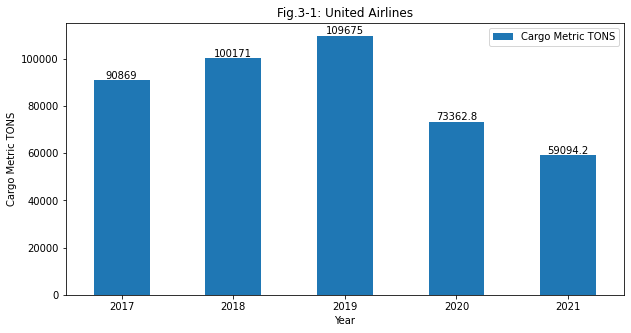

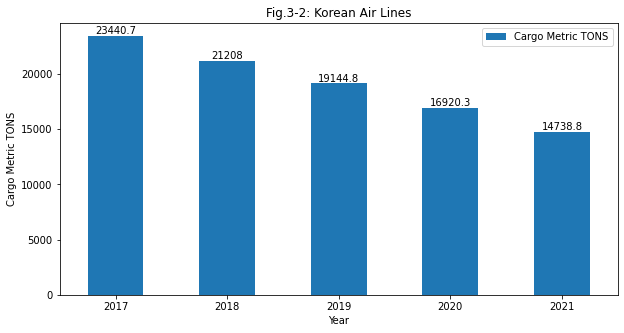

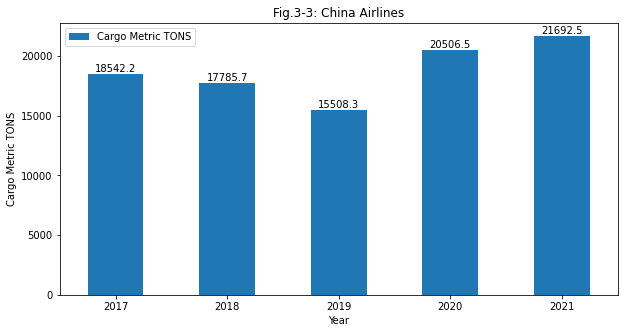

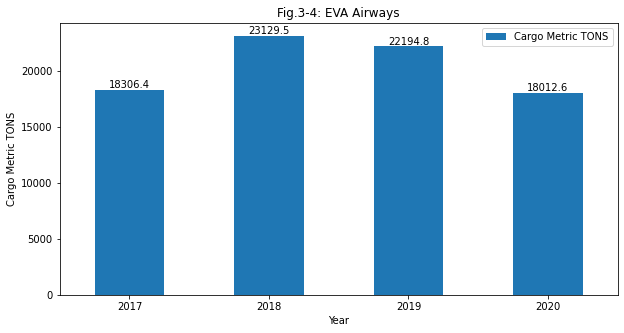

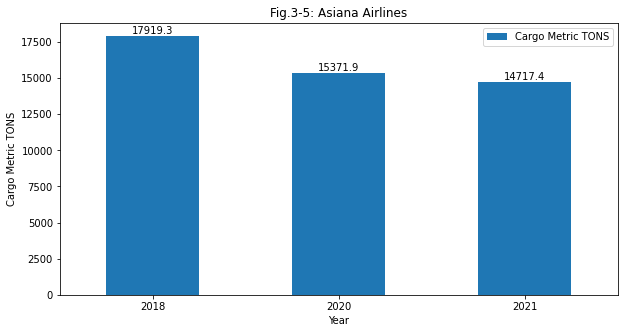

In [38]:
#Step C-3.9: Plot the yearly shipments of top five airlines (in order as stored in air_list DF)
count=1

for val in air_list:
    container=new_air_df[new_air_df['Airline']==val].plot(kind='bar',rot=0,title='Fig.3-'+str(count)+': '+val,figsize=(10,5),ylabel='Cargo Metric TONS')
    plt.bar_label(container.containers[0])
    plt.show()
    count=count+1

<u>**Observation & Analysis:**</u>
- United Airlines (HQ: USA), by far, has been the most frequent airline to operate to and from SFO, followed by Korean Airlines (HQ: South Korea), Taiwan-based China Airlines and EVA Airways, and Asiasa Airlines from South Korea.
- United Airlines cargo shipment fell from 109K Metric Tons in 2019 to 59K Metric Tons in 2021, which is around 45% of its pre-pandemic level.
- China Airlines is the only among the top 5 airline companies that showed a spike in operations to SFO during pandemic in 2020 and 2021 as well.
- The dominance of Asia based airlines can also be corroborated from the above discussed section on Asia being a major destination for cargo transport from SFO. According to [OEC](https://oec.world/en/profile/subnational_usa_port/san-francisco-ca-2809), Taiwan and South Korea are the fastest growing exports destination in Jan 2021-2022 period. South Korea is also a rapidly declining import destination from SFO. In above section, we discussed that overall exports are increasing and imports are falling from Asia, and the report from OEC also corroborates the conclusion.

In [39]:
#Optional
'''
#### **Question 4**:

**What is the annual growth rate of exports and imports (in Qt.) for every region?**


#Step C-3.1: Creating a dataframe to store growth rate: Columns are exports and import CAGR, rows would be the list of regions
growth=pd.DataFrame(columns=['Export CAGR %','Import CAGR %'],index=regions)

#Step C-3.2: Defining variables for storing earliest and latest year for which data is available from export and import summary tables. It is possible that some countries might not have total exported and imported weights in certain years. It can be verified by printing the export_summary and import summary table.    
max_year=max(export_summary.index)
min_year=min(export_summary.index)

#Step C-3.3: Evaluating the cagr for export and import for every region
for val in regions:
    #(a) Selecting the export values for a region defined by 'val' in for loop
    tempex=export_summary[val]
    #(b) Check if the export data is non-zero for the latest year. If not, continue to check the previous years data and store the year with the latest non-zero data.
    if tempex[max_year]==0:
        while tempex[max_year]==0:
            max_year=max_year-1
     #(c) Check if the export data is non-zero for the earliest year. If not, continue to check the subsequest years data and store the year with the earliest non-zero data. 
    if tempex[min_year]==0:
        while tempex[min_year]==0:
            min_year=min_year+1
    
    #(d) Calculate the CAGR for exports for the region
    rate_ex=round(((((tempex[max_year]/tempex[min_year])**(1/(2021-2005)))-1)*100),2)
    
    #(e) Update the growth matrix for the resepctive region
    growth['Export CAGR %'][val]=rate_ex
    #-------------------------------------------------------------------
    #(f) Steps (a) to (e) followed for exports (as shown above) is implemented for calculating import CAGR as well.
    max_im=max(import_summary.index)
    min_im=min(import_summary.index)
    tempim=import_summary[val]
    if tempim[max_im]==0:
        while tempim[max_im]==0:
            max_im=max_im-1
     
    if tempim[min_im]==0:
        while tempim[min_im]==0:
            min_im=min_im+1
    
    rate_im=round(((((tempim[max_im]/tempim[min_im])**(1/(2021-2005)))-1)*100),2)
    
    
    growth['Import CAGR %'][val]=rate_im
#(g) Print the growth matrix  
print(growth)


#Step C-3.4: Extracting the Absolute values of qt. exported in 2021 for every region
exports_2021=export_summary.transpose()[2021]
#Step C-3.5: Extracting the Absolute values of qt. imported in 2021 for every region
imports_2021=import_summary.transpose()[2021]

#Step C-3.6: Updating the 2021 quantity values of every country with the respective CAGR for exports and imports
exports_2021=pd.concat([exports_2021, growth['Export CAGR %']], axis=1)
imports_2021=pd.concat([imports_2021, growth['Import CAGR %']], axis=1)

exports_2021.rename({2021: 'Exports-2021'},axis='columns',inplace=True)
imports_2021.rename({2021: 'Imports-2021'},axis='columns',inplace=True)

#Step C-3.7: Dropping the rows 'Total Exports' and 'Total Imports' from the 2021 export, import tables
exports_2021.drop(['Total Exports'],inplace=True)
imports_2021.drop(['Total Imports'],inplace=True)

#Step C-3.8: Creating and updating a column called 'Projected Exports' and 'Projected Imports' in respective 2021 export,import tables
exports_2021['Proj. Exports']=exports_2021['Exports-2021']*(1+(exports_2021['Export CAGR %'])/100)
imports_2021['Proj. Imports']=imports_2021['Imports-2021']*(1+(imports_2021['Import CAGR %'])/100)

#Step C-3.9: Dropping 'Export CAGR %' column as it has been used to calculate the projected exports
exports_2021.drop(['Export CAGR %'],axis=1,inplace=True)

#Step C-3.10: Dropping 'Import CAGR %' column as it has been used to calculate the projected imports
imports_2021.drop(['Import CAGR %'],axis=1,inplace=True)

Step C-3.11: Plotting 2021 Vs Projected Exports and Imports separately for every region, along with printing the Growth matrix containing the CAGR values
#figure,axes=plt.subplots(1,2,figsize=(30,10))
container1=exports_2021.plot(kind='bar',rot=0,color=['green','violet'],xlabel='Regions', ylabel='Cargo Qt (KiloTonnes)',figsize=(20,10))
plt.bar_label(container1.containers[0], label_type='edge')
plt.bar_label(container1.containers[1], label_type='edge')

#container2=imports_2021.plot(ax=axes[1],kind='bar',rot=0,color=['red','yellow'],xlabel='Regions', ylabel='Cargo Qt (KiloTonnes)')
#plt.bar_label(container2.containers[0], label_type='edge')
plt.show()
print('Growth Matrix (CAGR values) : ')
print(growth)

#Step C-3.4: Plot the growth matrix

container=growth.plot(kind='bar',rot=0,title='Annual Growth Rate (%)',xlabel='Country',grid=True,ylabel='Percentage (%)',figsize=(20,10),color=['green','red'])
plt.bar_label(container.containers[0], label_type='edge')
plt.bar_label(container.containers[1], label_type='edge')
plt.show()
'''

"\n#### **Question 4**:\n\n**What is the annual growth rate of exports and imports (in Qt.) for every region?**\n\n\n#Step C-3.1: Creating a dataframe to store growth rate: Columns are exports and import CAGR, rows would be the list of regions\ngrowth=pd.DataFrame(columns=['Export CAGR %','Import CAGR %'],index=regions)\n\n#Step C-3.2: Defining variables for storing earliest and latest year for which data is available from export and import summary tables. It is possible that some countries might not have total exported and imported weights in certain years. It can be verified by printing the export_summary and import summary table.    \nmax_year=max(export_summary.index)\nmin_year=min(export_summary.index)\n\n#Step C-3.3: Evaluating the cagr for export and import for every region\nfor val in regions:\n    #(a) Selecting the export values for a region defined by 'val' in for loop\n    tempex=export_summary[val]\n    #(b) Check if the export data is non-zero for the latest year. If not,